In [1]:
%matplotlib inline
"""
Modified from http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
"""

/Users/rahulkrishnan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:

# Authors: Vlad Niculae, Alexandre Gramfort
# License: BSD 3 clause

import logging
from time import time

from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn import decomposition

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

Automatically created module for IPython interactive environment


Load faces data


In [3]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/rahulkrishnan/scikit_learn_data
Dataset consists of 400 faces


In [4]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

List of the different estimators, whether to center and transpose the
problem, and whether the transformer uses the clustering API.


In [9]:
estimators = [
    
    ('Eigenfaces - PCA with full SVD',
     decomposition.PCA(n_components=n_components, svd_solver='full',
                       whiten=True),
     True),
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True),
     True),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=2),
     True),
]

Plot a sample of the input data


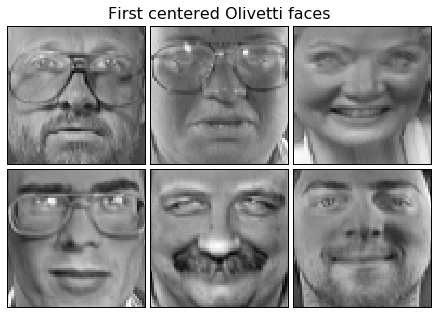

In [10]:
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

Do the estimation and plot it


Extracting the top 6 Eigenfaces - PCA with full SVD...
done in 0.196s
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.073s
Extracting the top 6 Independent components - FastICA...
done in 0.131s
Extracting the top 6 Factor Analysis components - FA...
done in 0.084s


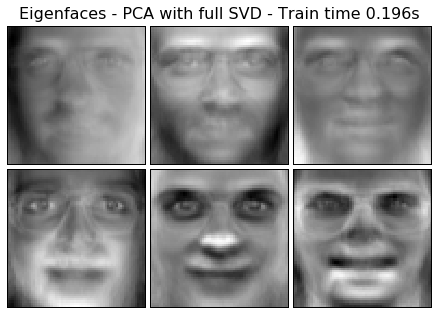

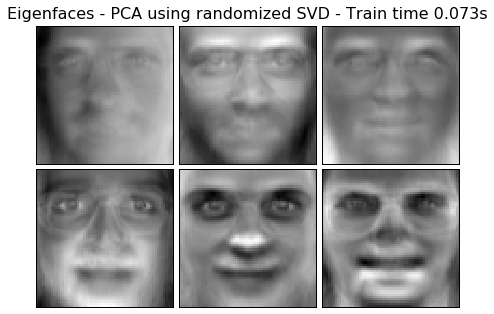

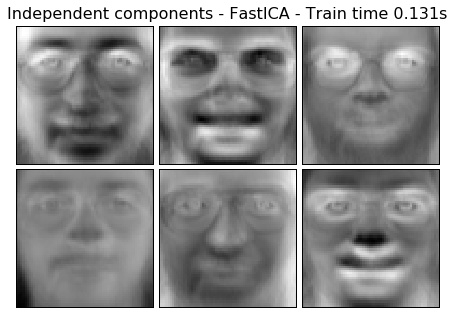

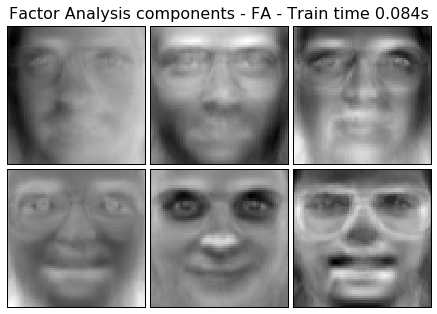

In [12]:
for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    plot_gallery('%s - Train time %.3fs' % (name, train_time),
                 components_[:n_components])

plt.show()